# 1. Выравнивание вручную

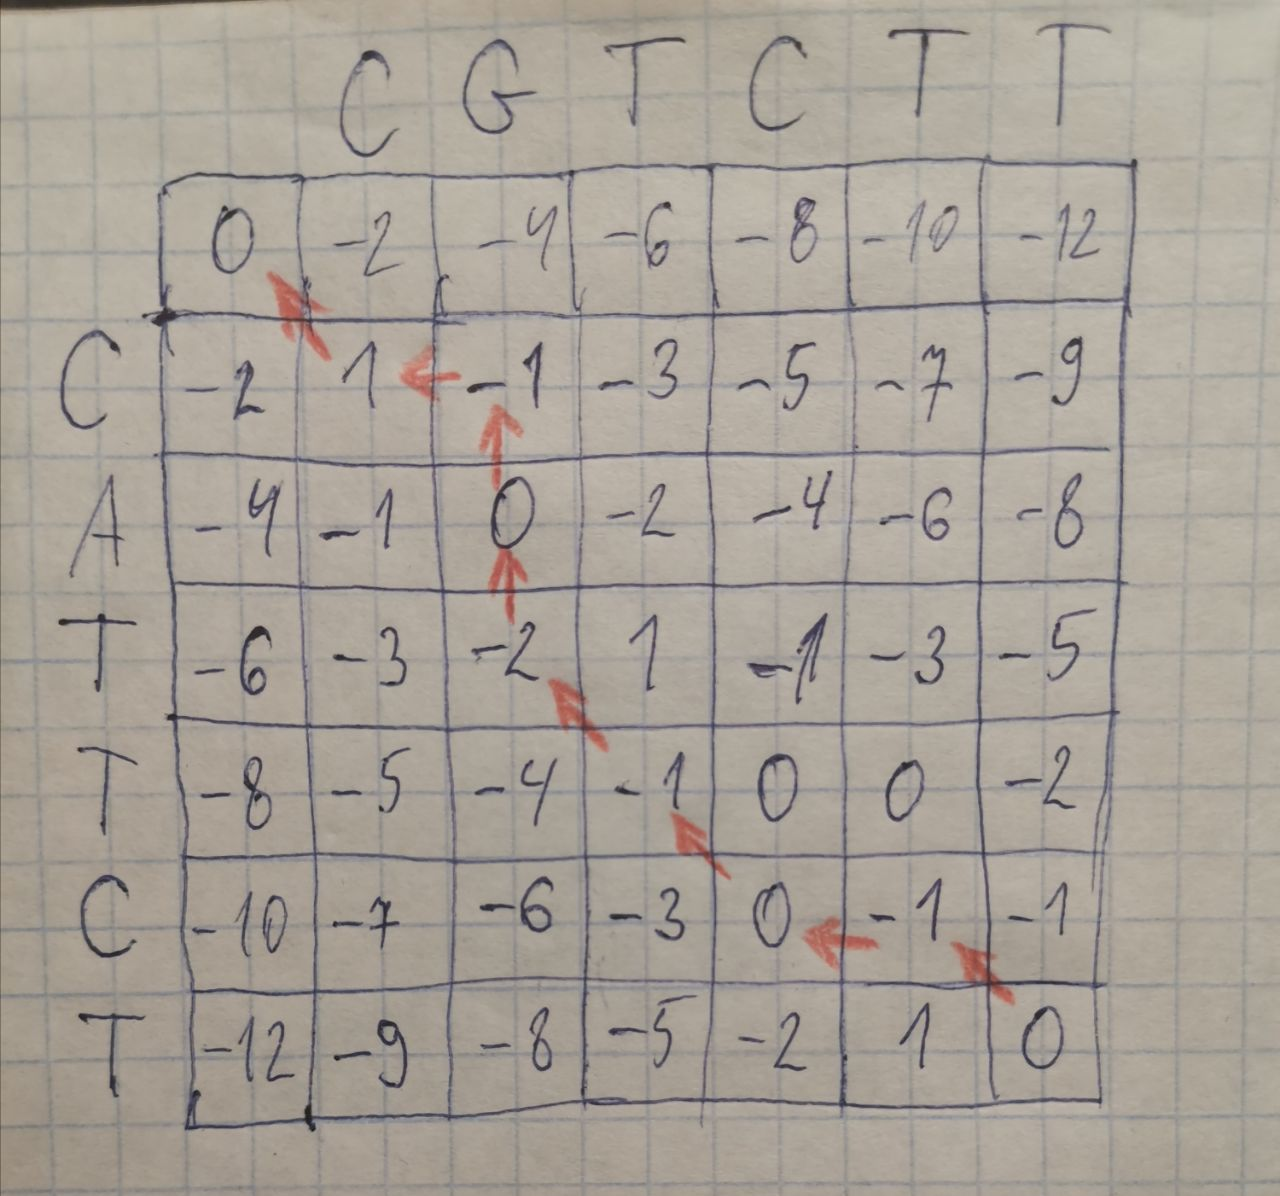

# 2. Выравнивание с использованием алгоритма Нидлмана-Вунша

In [11]:
sequences = [['CGTCTT', 'CATTCT'], ['CAAGCT', 'CATTGT'], ['AAATAAA', 'ATCTAA']]
matches = [1, 1, 1]
mismatches = [-1, -1, -1]
indels = [-2, -1, -1]

In [12]:
def needleman_wunsch(sequence, match, mismatch, indel):
    seq1 = sequence[0]
    seq2 = sequence[1]
    dp = [[0] * (len(seq2) + 1) for _ in range(len(seq1) + 1)]

    for i in range(len(seq1) + 1):
        dp[i][0] = indel * i
    for j in range(len(seq2) + 1):
        dp[0][j] = indel * j

    for i in range(1, len(seq1) + 1):
        for j in range(1, len(seq2) + 1):
          if seq1[i - 1] == seq2[j - 1]:
            score = match
          else:
            score = mismatch
          dp[i][j] = max(dp[i - 1][j - 1] + score,
                           dp[i - 1][j] + indel,
                           dp[i][j - 1] + indel)

    return dp

In [13]:
def traceback(dp, sequence, match, mismatch, indel):
    seq1 = sequence[0]
    seq2 = sequence[1]
    resseq1 = ""
    resseq2 = ""
    i = len(seq1)
    j = len(seq2)

    while i > 0 or j > 0:
        if i > 0 and j > 0 and dp[i][j] == dp[i - 1][j - 1] + (match if seq1[i - 1] == seq2[j - 1] else mismatch):
            resseq1 = seq1[i - 1] + resseq1
            resseq2 = seq2[j - 1] + resseq2
            i -= 1
            j -= 1
        elif i > 0 and dp[i][j] == dp[i - 1][j] + indel:
            resseq1 = seq1[i - 1] + resseq1
            resseq2 = "-" + resseq2
            i -= 1
        else:
            resseq1 = "-" + resseq1
            resseq2 = seq2[j - 1] + resseq2
            j -= 1

    score = dp[len(seq1)][len(seq2)]
    return resseq1, resseq2, score

In [14]:
traceback(needleman_wunsch(sequences[0], matches[0], mismatches[0], indels[0]), sequences[0], matches[0], mismatches[0], indels[0])

('CGTCTT', 'CATTCT', 0)

In [15]:
traceback(needleman_wunsch(sequences[1], matches[1], mismatches[1], indels[1]), sequences[1], matches[1], mismatches[1], indels[1])

('CA-AGCT', 'CATTG-T', 1)

In [16]:
traceback(needleman_wunsch(sequences[2], matches[2], mismatches[2], indels[2]), sequences[2], matches[2], mismatches[2], indels[2])

('AAATAAA', 'ATCT-AA', 1)

# 3. Проверка с помощью глобального выравнивания Python

In [17]:
pip install biopython

In [18]:
from Bio import pairwise2
from Bio.pairwise2 import format_alignment

In [19]:

def align(sequence, match, mismatch, indel):

    # Глобальное выравнивание с заданными параметрами
    global_alignments = pairwise2.align.globalms(sequence[0], sequence[1], match, mismatch, indel, indel)

    if global_alignments:
        best_alignment = global_alignments[0]
        print(format_alignment(*best_alignment))
    else:
        print("No global alignment found.")




In [20]:
align(sequences[0], matches[0], mismatches[0], indels[0])
align(sequences[1], matches[1], mismatches[1], indels[1])
align(sequences[2], matches[2], mismatches[2], indels[2])

CGTCTT
|.|..|
CATTCT
  Score=0

CAA-GCT
||. | |
CATTG-T
  Score=1

AAATAAA
|..| ||
ATCT-AA
  Score=1

